# Water Levels in Texas Reservoirs

Data Source: https://waterdatafortexas.org/reservoirs/statewide

Imports libraries

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import matplotlib.ticker as mticker

Loads the statewide.csv downloaded from the Water Data for Texas site, extracts columns of interest, and creates the decimal_date and months variables

In [65]:
# Loads the csv file by comma delimeted, and skips the first 30 rows
data = np.loadtxt('C:/Users/anagomez/Final_Project/statewide.csv', delimiter=',', dtype=str, skiprows=30)  

# Extracts needed data from specific columns in the csv
dates = data[:, 0]  
reservoir_storage = data[:, 1].astype(float) # converts to float
percent_full = data[:, 3].astype(float) # converts to float

decimal_date = [] # empty list
months = [] # empty list

# loops through each row in the dates column and uses the datetime module
for date in dates:
    datetime = datetime.strptime(date, '%Y-%m-%d') # converts to datatime object
    year = datetime.year # extracts year
    day_of_year = datetime.timetuple().tm_yday # timetuple() returns a time tuple, tm_yday(Day of Year)
    decimal_year = year + (day_of_year / 365.25) # converts to decimal year
    decimal_date.append(decimal_year)
    months.append(datetime.month) # extracts month number

decimal_date = np.array(decimal_date) # converts from list to array
months = np.array(months) # converts from list to array

# Plot #1: Historical Reservoir Storage Levels 

Creates a plot using the date and reservoir storage columns from the csv. This plot displays all reservoir storage levels since 1933 to present day.

In [66]:
def historical_reservoir_storage_levels(dates, reservoir_storage):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, reservoir_storage, color='blue', label='Reservoir Storage')
    
    plt.xlabel('Year', size=20, fontdict={'fontname':'Times New Roman'})
    plt.ylabel('Reservoir Storage (acre-feet)', size=20, fontdict={'fontname':'Times New Roman'})
    plt.title('Historical Reservoir Storage Levels in Texas',  size=25, fontdict={'fontname':'Times New Roman'})
    plt.legend(fontsize=12, loc='upper left')
    plt.grid()
    
    # removes scientific notation format
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.ticklabel_format(style='plain', axis='y')
    
    plt.show()

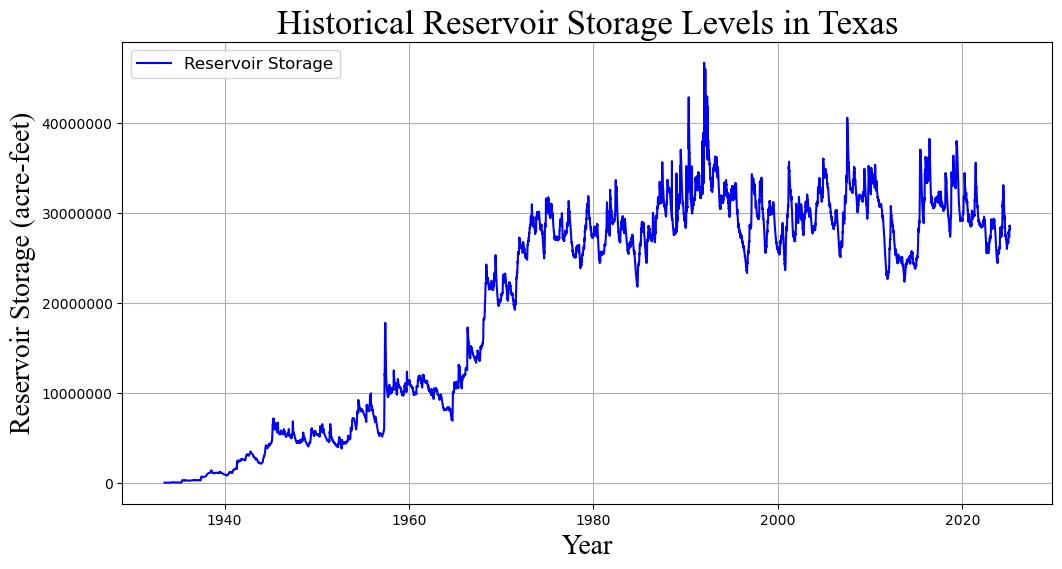

In [67]:
historical_reservoir_storage_levels(decimal_date, reservoir_storage)

# Plot #2: Reservoir Storage Levels Trajectory to Target Year

Creates a plot using the date, reservoir storage columns from the csv, and the selected target year to predict reservoir storage levels for the target year and includes a linear trendline.

In [68]:
def reservoir_storage_trajectory(dates, reservoir_storage, target_year):
    slope_intercept = np.polyfit(dates, reservoir_storage, deg=1) # degree 1 is to get a linear trend line
    res_storage_trend = np.poly1d(slope_intercept) # polynomial function from the slope_intercept
    
    # Predicts all future years up to the target year
    years_to_target = np.linspace(dates.min(), target_year, num=750) # 750 is the number of points generated
    predicted_storage_trajectory = res_storage_trend(years_to_target)
    predicted_res_storage = res_storage_trend(target_year)

    plt.figure(figsize=(12, 6))
    plt.plot(dates, reservoir_storage, color='blue', linestyle='-', linewidth=1, label='Historical Reservoir Storage Level')
    plt.plot(years_to_target, predicted_storage_trajectory, color='red', linestyle='--', label='Predicted Reservoir Storage Trajectory') # trendline
    # Storage level prediction for target year
    plt.scatter(target_year, predicted_res_storage, color='green', label='Predicted Storage: ' + str(round(predicted_res_storage, 2)) + ' acre-feet in ' + str(target_year), s=200)

    plt.xlabel('Year', size=20, fontdict={'fontname':'Times New Roman'})
    plt.ylabel('Reservoir Storage (acre-feet)', size=20, fontdict={'fontname':'Times New Roman'})
    plt.title('Texas Reservoir Storage Predicted Trajectory (Year ' + str(target_year) + ')', size=25, fontdict={'fontname':'Times New Roman'})
    plt.legend(fontsize=12, loc='upper left')
    plt.grid()
    
    # removes scientific notation format
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.ticklabel_format(style="plain", axis="y")
    
    plt.show()

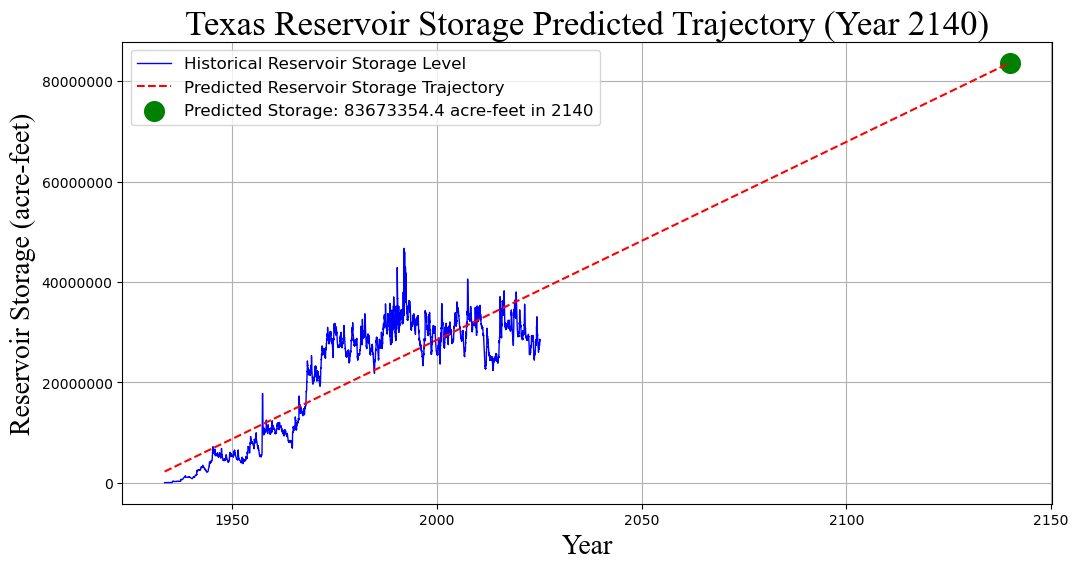

In [69]:
reservoir_storage_trajectory(decimal_date, reservoir_storage, target_year=2140) # prediction year can be changed here

# Plot #3: Reservoir Fullness Percentage

Creates a plot using the date and percentage full columns from the csv. This plot displays how full reservoirs have been over the years since 1933 to present day.

In [70]:
def percentage_full_capacity(dates, percentage_full):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, percentage_full, color='purple', label='Reservoir  Full')

    plt.xlabel('Year', size=20, fontdict={'fontname':'Times New Roman'})
    plt.ylabel('Percentage Full (%)', size=20, fontdict={'fontname':'Times New Roman'})
    plt.title('Percentage Full for Reservoir (1933 to 2025)', size=25, fontdict={'fontname':'Times New Roman'})
    plt.legend(fontsize=12, loc='lower right')
    plt.grid()

    plt.show()

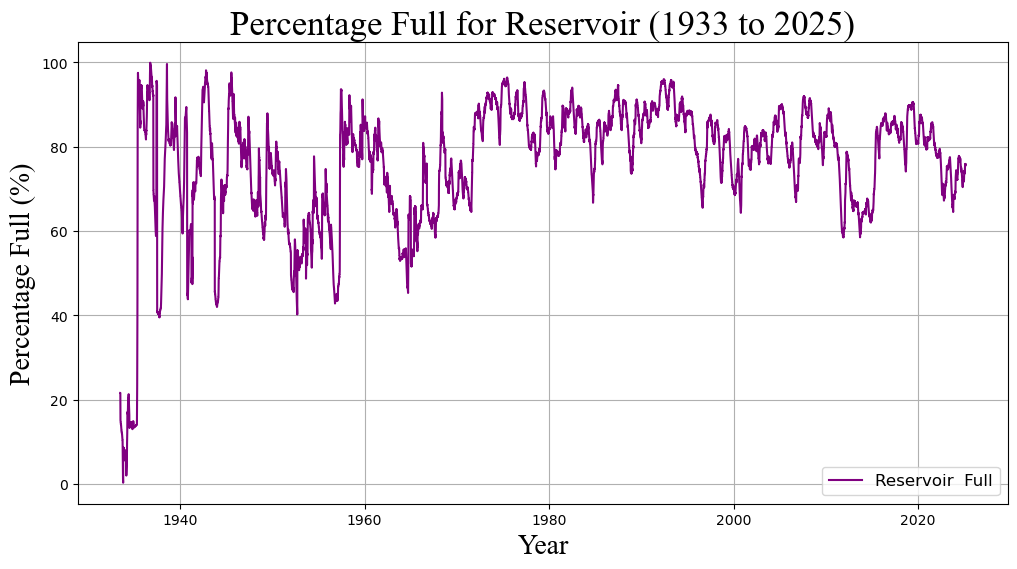

In [71]:
percentage_full_capacity(decimal_date, percent_full)

# Plot #4: Reservoir Historical Monthly Averages

Creates a plot using reservoir storage column from the csv and the previously created months variable. The average is calculated by getting the average of each month from 1933 to 2025. This plot displays the monthly averages for each month.

In [72]:
def monthly_averages(reservoir_storage, months):
    monthly_avg_storage = [] # empty list
    # loops through each month for all years and calculates the average for each month
    for month in range(1, 13):
        storage_values = reservoir_storage[months == month] # filters the array and only returns values for specified month
        avg_storage = np.mean(storage_values) if len(storage_values) > 0 else 0 # calculates average and if no value exists then returns 0
        monthly_avg_storage.append(avg_storage) # adds avg_storage to monthly_avg_storage list

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 13), monthly_avg_storage, color='green', marker='D', linestyle="-", linewidth=2, label='Average Storage')

    plt.xlabel('Month', size=20, fontdict={'fontname':'Times New Roman'})
    plt.ylabel('Average Reservoir Storage (acre-feet)', size=20, fontdict={'fontname':'Times New Roman'})
    plt.title('Reservoir Storage Monthly Averages', size=25, fontdict={'fontname':'Times New Roman'})
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.legend(fontsize=12, loc='upper left')

    # removes scientific notation format
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.ticklabel_format(style="plain", axis="y")
    
    plt.show()

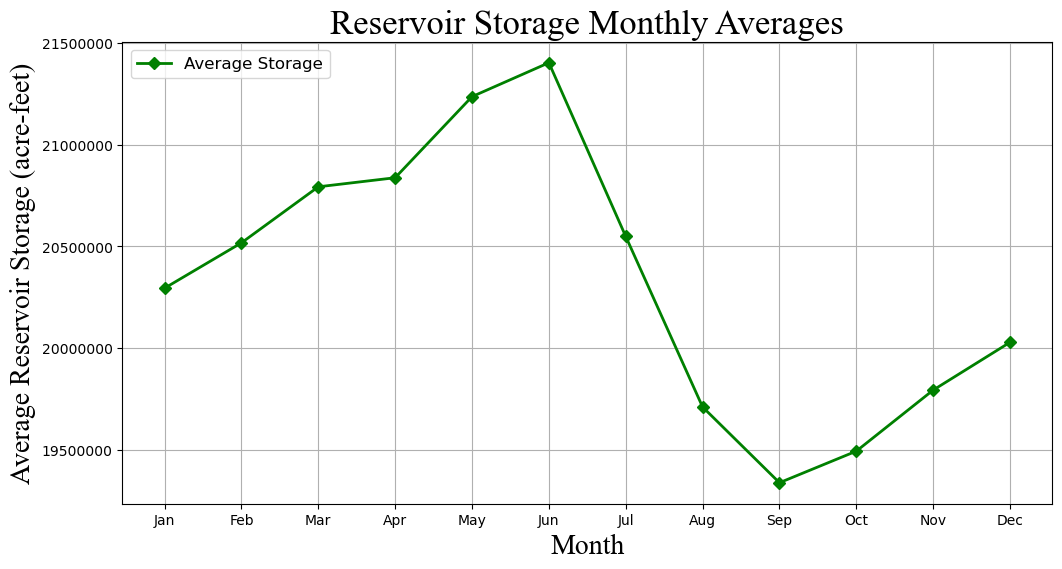

In [73]:
monthly_averages(reservoir_storage, months)

# Resources: #
* https://www.geeksforgeeks.org/python-datetime-module/
* https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot
* https://www.geeksforgeeks.org/timetuple-function-of-datetime-date-class-in-python/
* https://numpy.org/doc/stable/reference/generated/numpy.array.html
* https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
* https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
* https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
* https://www.w3schools.com/python/python_datetime.asp
* https://matplotlib.org/3.1.1/gallery/ticks_and_spines/scalarformatter.html
* https://waterdatafortexas.org/reservoirs/statewide